In [188]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils import load_checkpoint, cnn_test_step, mmnn_test_step
import pandas as pd
from dataloader import CustomDataloader
from networks import CNNRegression, MultiModalNetwork
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# Model 1 - Linear Regression Analysis

In [189]:

#load pkl files and plot the data
regression_theta = torch.load('tensor_collection\\lr_theta.pt').numpy()
regression_train_loss = torch.load('tensor_collection\\lr_train_losses.pt')
regression_val_loss = torch.load('tensor_collection\\lr_val_losses.pt')
cm_x_test = torch.load('tensor_collection\\lr_x_test.pt')
cm_y_test = torch.load('tensor_collection\\lr_y_test.pt')


Final training loss: 68.02940368652344
Final validation loss: 63.90153884887695


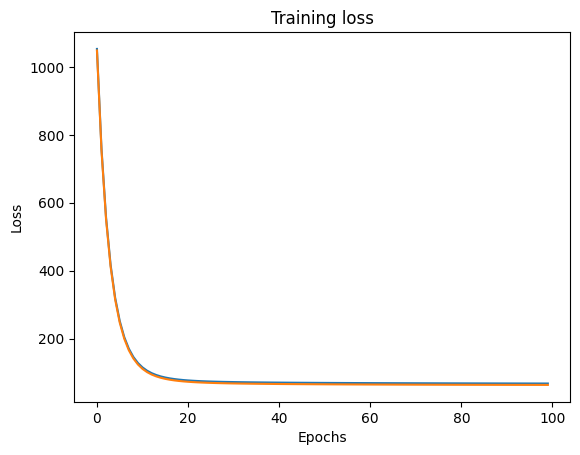

In [190]:
# plot the losses over time
plt.figure(0)
plt.plot(regression_train_loss)
plt.plot(regression_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', regression_train_loss[-1].item())
print('Final validation loss:', regression_val_loss[-1].item())

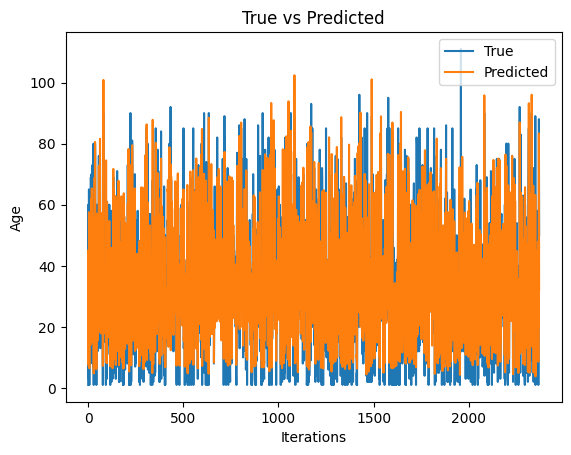

In [191]:
cm_y_hat = cm_x_test @ regression_theta

plt.figure()
plt.plot(cm_y_test)
plt.plot(cm_y_hat)
plt.title('True vs Predicted')
plt.xlabel('Iterations')
plt.ylabel('Age')
plt.legend(['True', 'Predicted'])

In [192]:

predictions = np.array(cm_y_hat)
actuals = np.array(cm_y_test)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-Squared: {r2}')


MSE: 65.72099050004442
RMSE: 8.10684837036221
MAE: 6.156400631180331
R-Squared: 0.8336367183636582


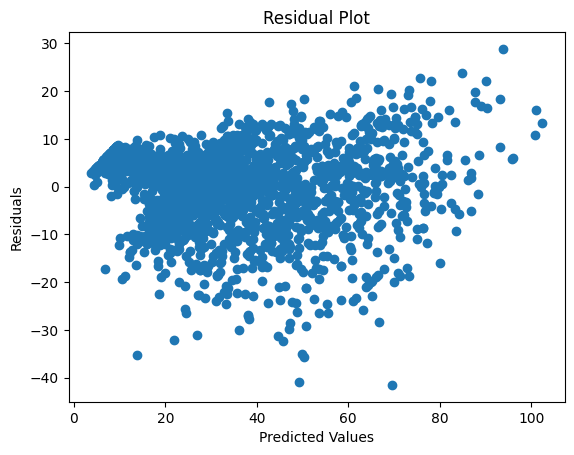

In [193]:
#Residual Plot
plt.figure(2)
plt.scatter(cm_y_hat, cm_y_hat-cm_y_test)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Model 2 - Convolutional Neural Network Analysis

In [194]:
cnn_train_loss = torch.load('tensor_collection\\cnn_train_losses.pt')
cnn_val_loss = torch.load('tensor_collection\\cnn_val_losses.pt')


In [195]:
directory = 'tensor_collection\\'

#load test  files
cnn_x_test = pd.read_csv(directory + 'cnn_x_test.csv')
cnn_y_test_tensor = torch.load(directory + 'cnn_y_test.pt')

print(type(cnn_x_test))
print(type(cnn_y_test_tensor))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [196]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_cnn = CNNRegression().to(device)

model_cnn, epochs = load_checkpoint('model_checkpoints\\cnn_checkpoint_final.pth', model_cnn)

batch_sz = 64

In [197]:
test_cnn_dataloader = CustomDataloader(dataframe=cnn_x_test, age=cnn_y_test_tensor, batch_size=batch_sz, randomize=False)

In [198]:
model_cnn.eval()  # Set the model to evaluation mode

predictions_cnn = []
actuals_cnn = []

predictions_cnn, actuals_cnn = cnn_test_step(model_cnn, test_cnn_dataloader, device)


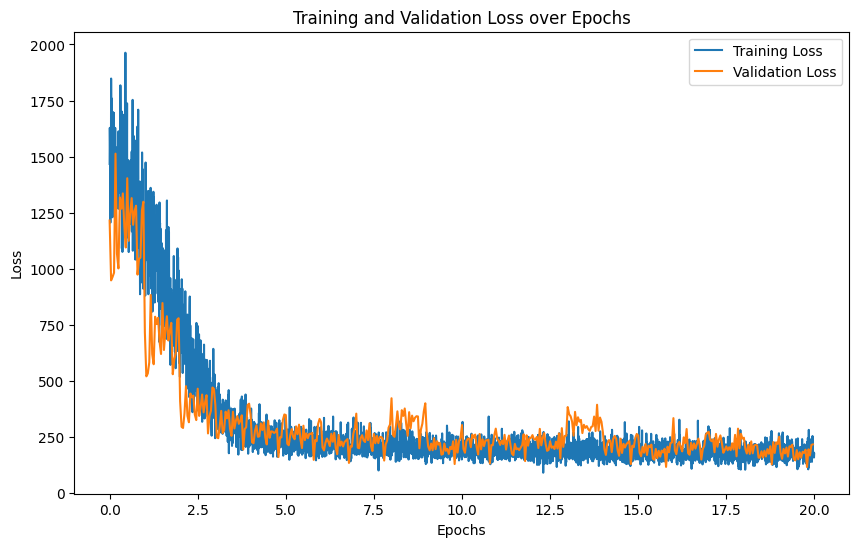

Final training loss: 174.8927459716797
Final validation loss: 217.00936889648438


In [199]:
# Assuming these are the lengths of your loss arrays
len_train_loss = len(cnn_train_loss)
len_val_loss = len(cnn_val_loss)


# Calculate the number of iterations per epoch for both training and validation
train_iters_per_epoch = len_train_loss / epochs
val_iters_per_epoch = len_val_loss / epochs

# Creating x-axis values for training and validation so that they align with epochs
train_epochs = np.arange(0, epochs, 1 / train_iters_per_epoch)
val_epochs = np.arange(0, epochs, 1 / val_iters_per_epoch)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_epochs[:len_train_loss], cnn_train_loss, label='Training Loss')
plt.plot(val_epochs[:len_val_loss], cnn_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Final training loss:', cnn_train_loss[-1])
print('Final validation loss:', cnn_val_loss[-1])

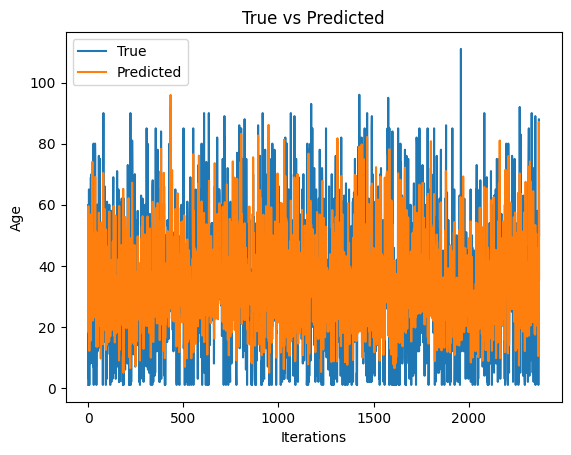

In [200]:
plt.figure()
plt.plot(actuals_cnn)
plt.plot(predictions_cnn)
plt.title('True vs Predicted')
plt.xlabel('Iterations')
plt.ylabel('Age')
plt.legend(['True', 'Predicted'])

In [201]:
# Converting lists to numpy arrays for calculation
predictions_cnn = np.array(predictions_cnn)
actuals_cnn = np.array(actuals_cnn)

mse_cnn = mean_squared_error(actuals_cnn, predictions_cnn)
rmse_cnn = np.sqrt(mse_cnn)
mae_cnn = mean_absolute_error(actuals_cnn, predictions_cnn)
r2_cnn = r2_score(actuals_cnn, predictions_cnn)

print(f'CNN MSE: {mse_cnn}')
print(f'CNN RMSE: {rmse_cnn}')
print(f'CNN MAE: {mae_cnn}')
print(f'CNN R-Squared: {r2_cnn}')

CNN MSE: 170.04554748535156
CNN RMSE: 13.040151596069336
CNN MAE: 9.972759246826172
CNN R-Squared: 0.5695539942912338


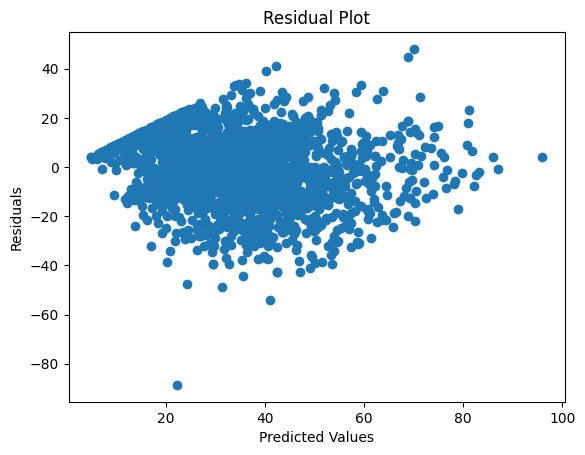

In [202]:
#Residual Plot
plt.figure(4)
plt.scatter(predictions_cnn, predictions_cnn-actuals_cnn)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

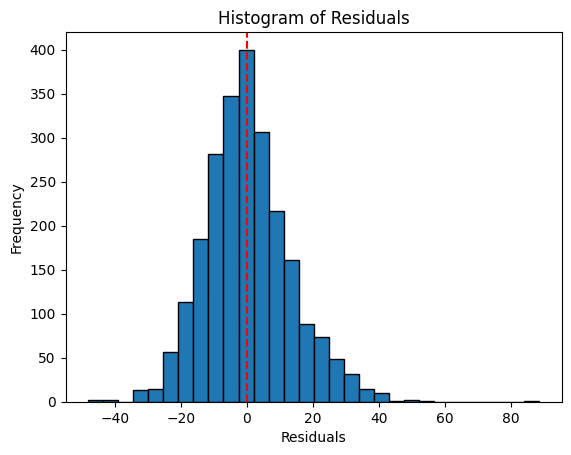

In [203]:
residuals = actuals_cnn - predictions_cnn

# Plot histogram of residuals
plt.figure(5)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.axvline(x=0, color='red', linestyle='--')  # Add a line at x=0 for reference
plt.show()

# Model 3 - Multi Modal Neural Network - Analysis

In [204]:
mmnn_train_loss = torch.load('tensor_collection\\mmnn_train_losses.pt')
mmnn_val_loss = torch.load('tensor_collection\\mmnn_val_losses.pt')

In [205]:
directory = 'tensor_collection\\'
mmnn_x_test = pd.read_csv(directory + 'mmnn_x_test.csv')
mmnn_y_test_tensor = torch.load(directory + 'mmnn_y_test.pt')

print(type(mmnn_x_test))
print(type(mmnn_y_test_tensor))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [206]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_numerical_features = mmnn_x_test.shape[1] - 1 # -1 because we don't count the filename column
model_mmnn = MultiModalNetwork(num_numerical_features).to(device)
model_mmnn, epochs = load_checkpoint('model_checkpoints\\mmnn_checkpoint_final.pth', model_mmnn)
batch_sz = 64

In [207]:
test_mmnn_dataloader = CustomDataloader(dataframe=mmnn_x_test, age=mmnn_y_test_tensor, batch_size=batch_sz, randomize=False)

In [208]:
model_mmnn.eval()  

predictions_mmnn = []
actuals_mmnn = []

predictions_mmnn, actuals_mmnn = mmnn_test_step(model_mmnn, test_mmnn_dataloader, device)


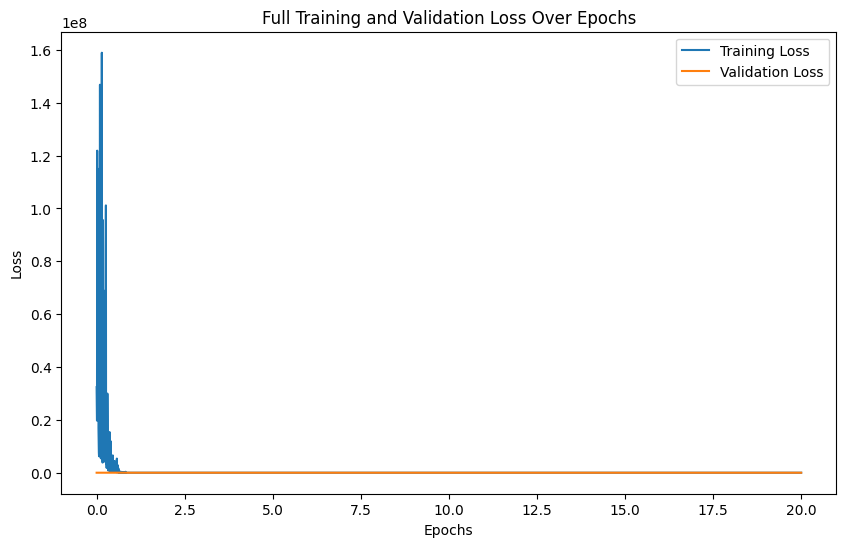

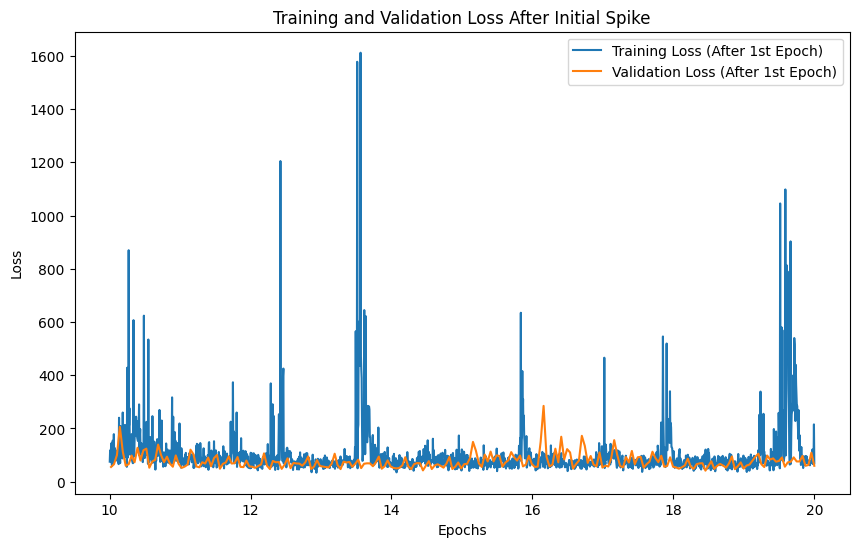

Final training loss: 68.83832550048828
Final validation loss: 59.66010665893555


In [214]:
# Calculate the number of iterations per epoch for training and validation
train_iters_per_epoch = len(mmnn_train_loss) / epochs
val_iters_per_epoch = len(mmnn_val_loss) / epochs

# Create x-axis values for training and validation
train_epochs = np.linspace(0, epochs, len(mmnn_train_loss))
val_epochs = np.linspace(0, epochs, len(mmnn_val_loss))

# Plotting full loss history (Graph 1)
plt.figure(figsize=(10, 6))
plt.plot(train_epochs, mmnn_train_loss, label='Training Loss')
plt.plot(val_epochs, mmnn_val_loss, label='Validation Loss')
plt.title('Full Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting loss history excluding the first epoch (Graph 2)
start_idx_train = int(10*train_iters_per_epoch)  # Index to start after the first epoch for training
start_idx_val = int(10*val_iters_per_epoch)  # Index to start after the first epoch for validation

plt.figure(figsize=(10, 6))
plt.plot(train_epochs[start_idx_train:], mmnn_train_loss[start_idx_train:], label='Training Loss (After 1st Epoch)')
plt.plot(val_epochs[start_idx_val:], mmnn_val_loss[start_idx_val:], label='Validation Loss (After 1st Epoch)')
plt.title('Training and Validation Loss After Initial Spike')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print final training and validation loss
print('Final training loss:', mmnn_train_loss[-1])
print('Final validation loss:', mmnn_val_loss[-1])

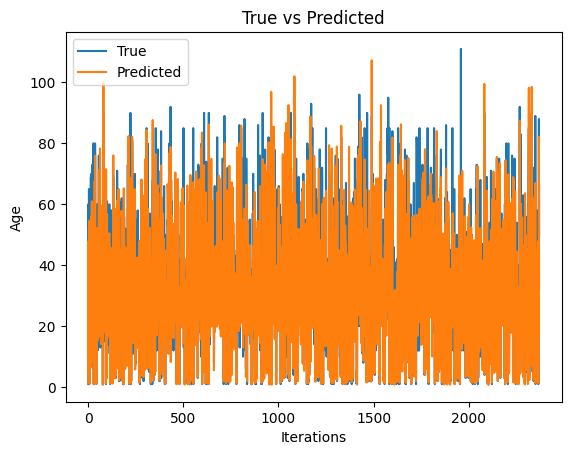

In [210]:
plt.figure()
plt.plot(actuals_mmnn)
plt.plot(predictions_mmnn)
plt.title('True vs Predicted')
plt.xlabel('Iterations')
plt.ylabel('Age')
plt.legend(['True', 'Predicted'])

In [211]:
# Converting lists to numpy arrays for calculation
predictions_mmnn = np.array(predictions_mmnn)
actuals_mmnn = np.array(actuals_mmnn)

mse_mmnn = mean_squared_error(actuals_mmnn, predictions_mmnn)
rmse_mmnn = np.sqrt(mse_mmnn)
mae_mmnn = mean_absolute_error(actuals_mmnn, predictions_mmnn)
r2_mmnn = r2_score(actuals_mmnn, predictions_mmnn)

print(f'Multi Modal Network MSE: {mse_mmnn}')
print(f'Multi Modal Network RMSE: {rmse_mmnn}')
print(f'Multi Modal Network MAE: {mae_mmnn}')
print(f'Multi Modal Network R-Squared: {r2_mmnn}')

Multi Modal Network MSE: 80.27706146240234
Multi Modal Network RMSE: 8.959746360778809
Multi Modal Network MAE: 6.291645526885986
Multi Modal Network R-Squared: 0.7967901213580793


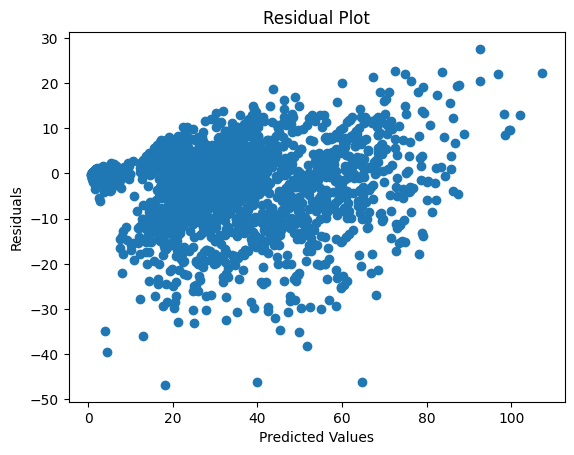

In [212]:
#Residual Plot
plt.figure(8)
plt.scatter(predictions_mmnn, predictions_mmnn-actuals_mmnn)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

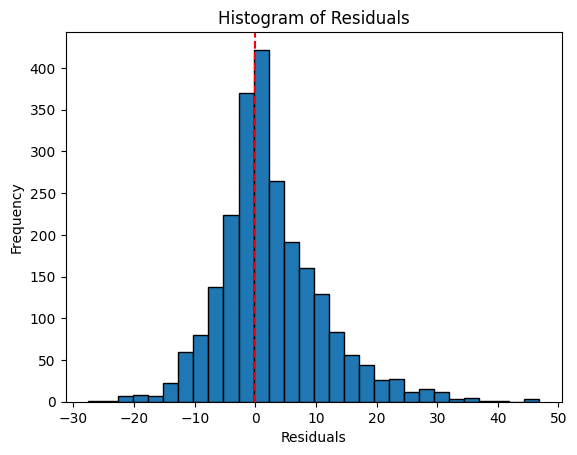

In [213]:
residuals = actuals_mmnn - predictions_mmnn

# Plot histogram of residuals
plt.figure(5)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.axvline(x=0, color='red', linestyle='--')  # Add a line at x=0 for reference
plt.show()